## 1 - Probleme Genel Bakış

## 2 - Veriyi Toplamak

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("score.csv")

## 3 - Veriyi İnceleme ve Görselleştirme

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
import matplotlib.pyplot as plt

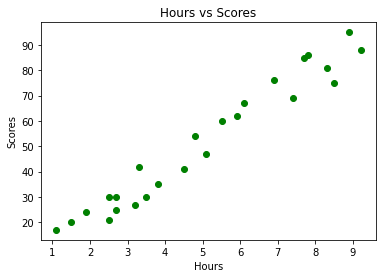

In [7]:
plt.scatter(x=df["Hours"], y=df["Scores"], color = "green")

plt.xlabel("Hours")
plt.ylabel("Scores")

plt.title("Hours vs Scores")
plt.show()

## 4 - Veriyi Modele Uygun Hale Getirmek

In [8]:
x = df["Hours"] #bağımsız değişken
y = df["Scores"] #bağımlı değişken

In [9]:
x

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [10]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [11]:
import sklearn.model_selection

In [12]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size = 0.8)

In [13]:
x_train

22    3.8
21    4.8
17    1.9
11    5.9
16    2.5
6     9.2
3     8.5
19    7.4
24    7.8
2     3.2
14    1.1
23    6.9
20    2.7
13    3.3
18    6.1
4     3.5
1     5.1
15    8.9
7     5.5
10    7.7
Name: Hours, dtype: float64

In [14]:
y_train

22    35
21    54
17    24
11    62
16    30
6     88
3     75
19    69
24    86
2     27
14    17
23    76
20    30
13    42
18    67
4     30
1     47
15    95
7     60
10    85
Name: Scores, dtype: int64

In [15]:
x_test

5     1.5
0     2.5
8     8.3
12    4.5
9     2.7
Name: Hours, dtype: float64

In [16]:
y_test

5     20
0     21
8     81
12    41
9     25
Name: Scores, dtype: int64

In [17]:
x_test.shape

(5,)

In [18]:
import numpy as np

In [19]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [20]:
x_train

array([3.8, 4.8, 1.9, 5.9, 2.5, 9.2, 8.5, 7.4, 7.8, 3.2, 1.1, 6.9, 2.7,
       3.3, 6.1, 3.5, 5.1, 8.9, 5.5, 7.7])

In [21]:
x_test.shape

(5,)

In [41]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [42]:
x_test

array([[1.5],
       [2.5],
       [8.3],
       [4.5],
       [2.7]])

## 5 - Model Seçimi ve Modelin Eğitimi

In [43]:
import sklearn.linear_model

In [44]:
lin_model = sklearn.linear_model.LinearRegression()

In [45]:
lin_model.fit(x_train, y_train)

LinearRegression()

## 6 - Modelin Optimize Edilmesi

In [46]:
import sklearn.metrics

In [47]:
predictions = lin_model.predict(x_test)

In [50]:
x_test[-1]

array([2.7])

In [48]:
predictions

array([[18.2965349 ],
       [27.96763387],
       [84.0600079 ],
       [47.30983181],
       [29.90185367]])

In [53]:
for i in range(len(x_test)):
    print(f"{i}: Gerçek Değer: {y_test[i]} - Tahmin: {predictions[i]}")

0: Gerçek Değer: [20] - Tahmin: [18.2965349]
1: Gerçek Değer: [21] - Tahmin: [27.96763387]
2: Gerçek Değer: [81] - Tahmin: [84.0600079]
3: Gerçek Değer: [41] - Tahmin: [47.30983181]
4: Gerçek Değer: [25] - Tahmin: [29.90185367]


In [56]:
#MAE
mae = sklearn.metrics.mean_absolute_error(y_test, predictions)
mae

4.588558470339636

In [58]:
#MSE
mse = sklearn.metrics.mean_squared_error(y_test, predictions)
mse

24.931102066890823

In [60]:
#R2
r2 = sklearn.metrics.r2_score(y_test, predictions)
r2

0.9527676908402342

In [62]:
print("MAE : {} - MSE : {} - R2 : {} ".format(mae, mse, r2))

MAE : 4.588558470339636 - MSE : 24.931102066890823 - R2 : 0.9527676908402342 


In [63]:
score_tahmini = lin_model.predict([[5]])
score_tahmini

array([[52.1453813]])

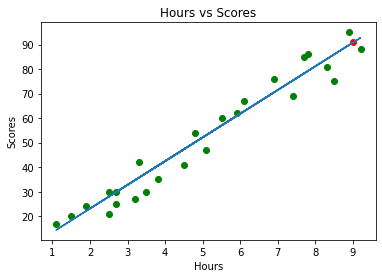

In [69]:
x_predictions = lin_model.predict(x_train)

plt.scatter(x=df["Hours"], y=df["Scores"], color = "green")
plt.plot(x_train, x_predictions)
plt.scatter(x=9, y = lin_model.predict([[9]]), color = "red")

plt.xlabel("Hours")
plt.ylabel("Scores")

plt.title("Hours vs Scores")
plt.show()